In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip

In [48]:
data = np.loadtxt("freq_pol_characterization_20221219_24_hours.txt")

In [49]:
data

array([[ 1.54000000e+03,  1.67148143e+09,  7.18783539e-08,
         9.80892764e-07,  7.42042005e-07,  1.65813253e-06],
       [ 1.54000000e+03,  1.67148143e+09,  3.01904720e-07,
         5.54146311e-07,  2.56348073e-07,  1.31527668e-06],
       [ 1.54000000e+03,  1.67148143e+09,  3.19045824e-07,
         5.52648942e-07,  2.54967915e-07,  1.31028787e-06],
       ...,
       [ 1.56000000e+03,  1.67156368e+09, -9.61600790e-08,
         1.13424699e-06,  7.01266401e-07,  1.83074530e-06],
       [ 1.56000000e+03,  1.67156368e+09, -7.71915438e-08,
         1.09781149e-06,  6.47561990e-07,  1.83785437e-06],
       [ 1.56000000e+03,  1.67156368e+09, -9.47873673e-08,
         1.16020124e-06,  7.39680047e-07,  1.82550707e-06]])

In [61]:
time_1540 = []
time_1545 = []
time_1550 = []
time_1555 = []
time_1560 = []

In [62]:
vh_1540 = []
vh_1545 = []
vh_1550 = []
vh_1555 = []
vh_1560 = []

In [63]:
da_1540 = []
da_1545 = []
da_1550 = []
da_1555 = []
da_1560 = []

In [64]:
for i,d in enumerate(data):
    if i%10 != 0:
        if d[0] == 1540:
            time_1540.append(datetime.datetime.fromtimestamp(d[1]))
            vh = d[3]/d[2]
            vh_1540.append(np.abs(vh))
            pd = d[4]/(d[5]+d[4])
            pa = d[5]/(d[5]+d[4])
            da_1540.append((pd-pa)/(2*np.sin(np.arctan(vh))))
        elif d[0] == 1545:
            time_1545.append(datetime.datetime.fromtimestamp(d[1]))
            vh = d[3]/d[2]
            vh_1545.append(np.abs(vh))
            pd = d[4]/(d[5]+d[4])
            pa = d[5]/(d[5]+d[4])
            da_1545.append((pd-pa)/(2*np.sin(np.arctan(vh))))
        elif d[0] == 1550:
            time_1550.append(datetime.datetime.fromtimestamp(d[1]))
            vh = d[3]/d[2]
            vh_1550.append(np.abs(vh))
            pd = d[4]/(d[5]+d[4])
            pa = d[5]/(d[5]+d[4])
            da_1550.append((pd-pa)/(2*np.sin(np.arctan(vh))))
        elif d[0] == 1555:
            time_1555.append(datetime.datetime.fromtimestamp(d[1]))
            vh = d[3]/d[2]
            vh_1555.append(np.abs(vh))
            pd = d[4]/(d[5]+d[4])
            pa = d[5]/(d[5]+d[4])
            da_1555.append((pd-pa)/(2*np.sin(np.arctan(vh))))
        elif d[0] == 1560:
            time_1560.append(datetime.datetime.fromtimestamp(d[1]))
            vh = d[3]/d[2]
            vh_1560.append(np.abs(vh))
            pd = d[4]/(d[5]+d[4])
            pa = d[5]/(d[5]+d[4])
            da_1560.append((pd-pa)/(2*np.sin(np.arctan(vh))))

Text(0.5, 1.0, 'Rantoul Loop VH Polarization')

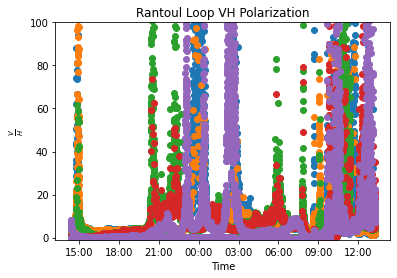

In [65]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time_1540,vh_1540,label='1540 nm',ls='',marker='o')
ax.plot(time_1545,vh_1545,label='1545 nm',ls='',marker='o')
ax.plot(time_1550,vh_1550,label='1550 nm',ls='',marker='o')
ax.plot(time_1555,vh_1555,label='1555 nm',ls='',marker='o')
ax.plot(time_1560,vh_1560,label='1560 nm',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=-1,top=100)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")

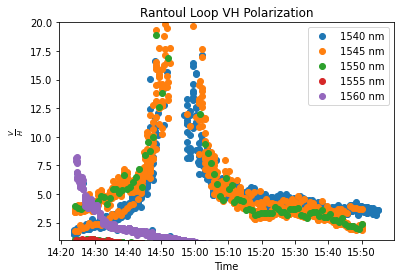

In [66]:
fig, ax = plt.subplots()
num_points = 1000
ax.plot(time_1540[:num_points],vh_1540[:num_points],label='1540 nm',ls='',marker='o')
ax.plot(time_1545[:num_points],vh_1545[:num_points],label='1545 nm',ls='',marker='o')
ax.plot(time_1550[:num_points],vh_1550[:num_points],label='1550 nm',ls='',marker='o')
ax.plot(time_1555[:num_points],vh_1555[:num_points],label='1555 nm',ls='',marker='o')
ax.plot(time_1560[:num_points],vh_1560[:num_points],label='1560 nm',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=1,top=20)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=1)

In [67]:
avg_vh_1540 = np.mean(np.array(vh_1540)[:-7].reshape(-1, 9), axis=1)
avg_vh_1545 = np.mean(np.array(vh_1545)[:-8].reshape(-1, 9), axis=1)
avg_vh_1550 = np.mean(np.array(vh_1550)[:-2].reshape(-1, 9), axis=1)
avg_vh_1555 = np.mean(np.array(vh_1555).reshape(-1, 9), axis=1)
avg_vh_1560 = np.mean(np.array(vh_1560)[:-8].reshape(-1, 9), axis=1)

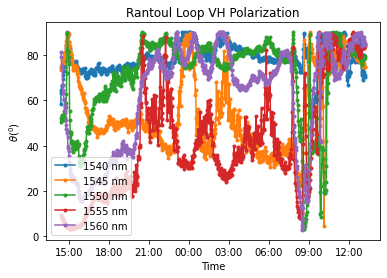

In [68]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_1540[::9][:num_points][::2],np.degrees(np.arctan(avg_vh_1540[:num_points][::2])),label='1540 nm',ls='-',marker='.')
ax.plot(time_1545[::9][:num_points][::2],np.degrees(np.arctan(avg_vh_1545[:num_points][::2])),label='1545 nm',ls='-',marker='.')
ax.plot(time_1550[::9][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_1550[:num_points][::2])),label='1550 nm',ls='-',marker='.')
ax.plot(time_1555[::9][:num_points][::2],np.degrees(np.arctan(avg_vh_1555[:num_points][::2])),label='1555 nm',ls='-',marker='.')
ax.plot(time_1560[::9][:num_points][::2],np.degrees(np.arctan(avg_vh_1560[:num_points][::2])),label='1560 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=3)
#plt.savefig('vh_drift_20221214.pdf')

In [69]:
avg_da_1540 = np.mean(np.array(da_1540)[:-7].reshape(-1, 9), axis=1)
avg_da_1545 = np.mean(np.array(da_1545)[:-8].reshape(-1, 9), axis=1)
avg_da_1550 = np.mean(np.array(da_1550)[:-2].reshape(-1, 9), axis=1)
avg_da_1555 = np.mean(np.array(da_1555).reshape(-1, 9), axis=1)
avg_da_1560 = np.mean(np.array(da_1560)[:-8].reshape(-1, 9), axis=1)

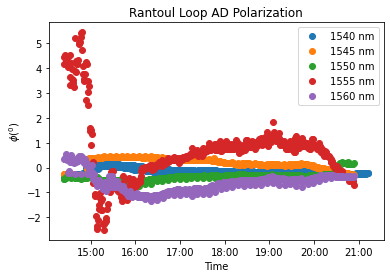

In [70]:
fig, ax = plt.subplots()
num_points = 500
ax.plot(time_1540[::9][:num_points],avg_da_1540[:num_points],label='1540 nm',ls='',marker='o')
ax.plot(time_1545[::9][:num_points],avg_da_1545[:num_points],label='1545 nm',ls='',marker='o')
ax.plot(time_1550[::9][:num_points],avg_da_1550[:num_points],label='1550 nm',ls='',marker='o')
ax.plot(time_1555[::9][:num_points],avg_da_1555[:num_points],label='1555 nm',ls='',marker='o')
ax.plot(time_1560[::9][:num_points],avg_da_1560[:num_points],label='1560 nm',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(loc=1)

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys


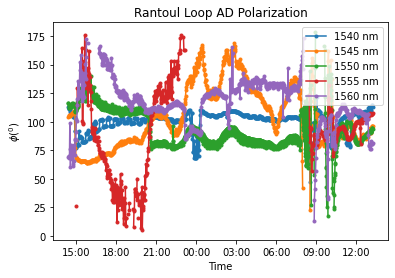

In [71]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_1540[::9][:num_points][::2],np.degrees(np.arccos(avg_da_1540[:num_points][::2])),label='1540 nm',ls='-',marker='.')
ax.plot(time_1545[::9][:num_points][::2],np.degrees(np.arccos(avg_da_1545[:num_points][::2])),label='1545 nm',ls='-',marker='.')
ax.plot(time_1550[::9][:num_points][:-1],np.degrees(np.arccos(avg_da_1550[:num_points])),label='1550 nm',ls='-',marker='.')
ax.plot(time_1555[::9][:num_points][::2],np.degrees(np.arccos(avg_da_1555[:num_points][::2])),label='1555 nm',ls='-',marker='.')
ax.plot(time_1560[::9][:num_points][::2],np.degrees(np.arccos(avg_da_1560[:num_points][::2])),label='1560 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=44.99,top=45.01)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(loc=1)
#plt.savefig("ad_drift_20221214.pdf")

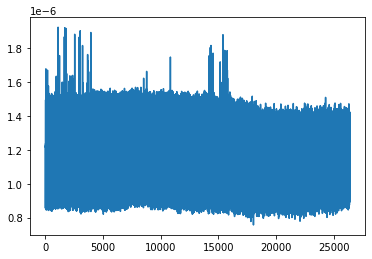

In [16]:
tot = []
for d in data:
    tot.append(d[2]+d[3])
plt.plot(tot)

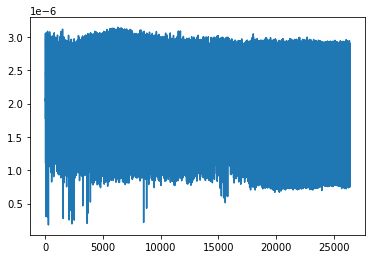

In [17]:
tot = []
for d in data:
    tot.append(d[3]+d[5])
plt.plot(tot)

In [32]:
data[-6:]

array([[ 1.55500000e+03,  1.67111548e+09, -1.31226955e-07,
         1.07597498e-06,  1.61163189e-06,  1.59969750e-06],
       [ 1.55500000e+03,  1.67111549e+09, -1.25736051e-07,
         1.08233871e-06,  1.63152231e-06,  1.60056766e-06],
       [ 1.56000000e+03,  1.67111549e+09, -9.81567609e-08,
         1.08845302e-06,  1.66471477e-06,  1.66471477e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.58216788e-07,
         3.72609122e-07,  1.77063180e-06,  1.70524163e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.53849167e-07,
         3.86546589e-07,  1.72774298e-06,  1.74875231e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.64955689e-07,
         3.63404467e-07,  1.76715093e-06,  1.76180538e-06]])

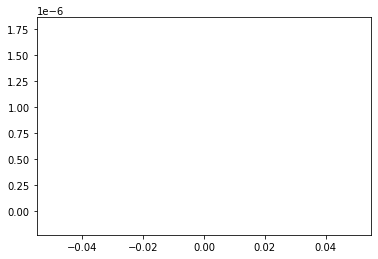